In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from random import randint

# Loading the Data

In [2]:
vif = pd.read_csv("Value_in_Force.csv")

Let's take a quick look at our diamonds dataset.

In [3]:
# Preview the top (five) rows of the dataset
vif.head()

,Firm,Equity_Attributable_to_Owners,Value_in_Force
0,1,437.019,170.699
1,2,310.940,280.328
2,3,449.285,309.534
3,4,474.194,323.184
4,5,408.375,281.190


A little more information about our dataset.

In [4]:
# Preview the little information about dataset
vif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 3 columns):
Firm                             190 non-null int64
Equity_Attributable_to_Owners    190 non-null float64
Value_in_Force                   190 non-null float64
dtypes: float64(2), int64(1)
memory usage: 4.6 KB


There are 190 instances in the dataset. There are also no missing instances in the dataset. That looks clean!

It's easier to work a dataset when all its attributes are numerical. 

They each don't have so many categories, but still, we will be having a much longer table (more columns). That aside for now.

Let's take a preview of the summary of the numerical attributes and then an histogram on the dataset.

In [5]:
# Summary of each numerical attribute
vif.describe()

,Firm,Equity_Attributable_to_Owners,Value_in_Force
count,190.000000,190.000000,190.000000
mean,95.500000,2094.821750,3604.012105
std,54.992424,1895.459543,2976.677790
min,1.000000,34.925203,97.300000
25%,48.250000,310.825210,677.275000
50%,95.500000,1695.906000,3301.500000
75%,142.750000,3776.165980,5482.375000
max,190.000000,5858.959088,12705.000000


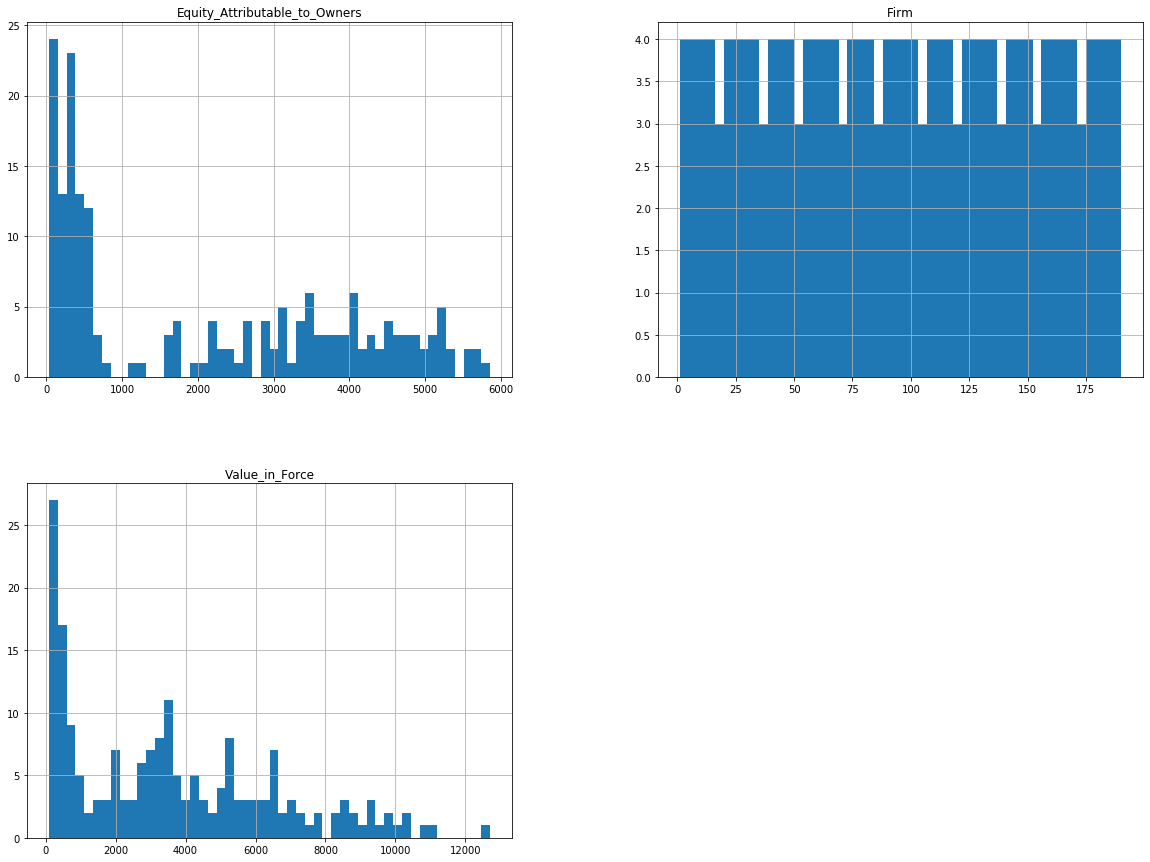

In [6]:
vif.hist(bins = 50, figsize = (20, 15))
plt.show()

Okay good! But there's also something important we have to do and that is "Creating a Test Set".

# Creating a Test Set

I have learnt it is a good practice to separate your Train Set and Test Set (80% and 20% from your dataset respectively). The Test set will make us see our model's performance on the new instances.

That is clear! But, even though we want to do this, it doesn't feel right taking purely random samples of the dataset, else we could introduce a significant Sampling Bias. A good solution is by performing Stratified Sampling. The dataset will be divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall dataset. (Hopefully, that's clear enough)

To use this, we will need a very important attribute of the dataset to predict the of the diamond. How can we try select the attribute even though the team of those who gave you data didn't give you a clue? This is where we need to know the attributes that are most correlated to the price of the diamond. We use the Standard Correlation Coefficient (Pearson's r) to determine.

In [7]:
# Create a correlation matrix between every pair of attributes
corr_matrix = vif.corr()
corr_matrix["Value_in_Force"].sort_values(ascending=False)

Value_in_Force                   1.000000
Equity_Attributable_to_Owners    0.800078
Firm                             0.600061
Name: Value_in_Force, dtype: float64

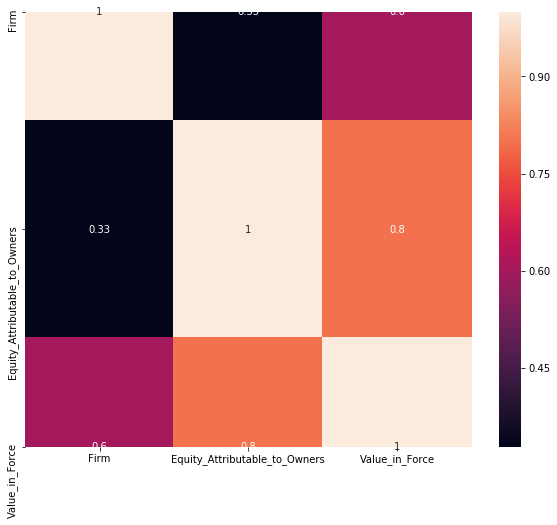

In [8]:
# Plot the correlation with seaborn
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [9]:
X = vif[['Equity_Attributable_to_Owners']]
y = vif['Value_in_Force']

In [10]:
X.head()

,Equity_Attributable_to_Owners
0,437.019
1,310.940
2,449.285
3,474.194
4,408.375


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47)

Now our dataset can easily be fed to our Machine Learning Algorithms.

# Select and Train Model

We will create one function that will run through each algorithm. We'll also have variables that hold results of the algorithms for future comparisons. What does our fat function do?

1. Fits the dataset into the model and create series of predictions to compare with labels. We check its performance with the RMSE.

2. Performs some evaluation using Cross validation, which splits the training set into a number of CVs and train the model on the smaller sets. We then compare its mean with our intial RMSE.

3. We view how well the model performs on our test set and compare its RMSE with that of the train set. Hopefully we don't have much difference.

4. Some accuracy test of the model on the dataset is being evaluated

5. We could also have a preview of what's going on. Some parts of the test set will be selected and then the model will run on them and we can then compare its result with the expected prices.

6. We also get a preview this model's plot results and see how well it fits

We can now start fitting models and get their performance error. Remember we are using Root Mean Squared Error for our performance measure.

Let's start with the easiest model - Linear Regression

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize = True)

In [13]:
lin_reg.fit(X, y)
lin_reg_model_predictions = lin_reg.predict(X)
lin_reg_model_accuracy = lin_reg.score(X, y)
print("Model Accuracy of The Linear Regression Model:", "{:.4%}".format(lin_reg_model_accuracy))
lin_reg_model_mse = mean_squared_error(y, lin_reg_model_predictions)
lin_reg_model_rmse = np.sqrt(lin_reg_model_mse)
print("Model RMSE of The Linear Regression Model: %.4f" %lin_reg_model_rmse)

Model Accuracy of The Linear Regression Model: 64.0125%
Model RMSE of The Linear Regression Model: 1780.9916


In [14]:
lin_reg.fit(X_train, y_train)
lin_reg_test_predictions = lin_reg.predict(X_test)
lin_reg_test_accuracy = lin_reg.score(X_test, y_test)
print("Tests Accuracy of The Linear Regression Model:", "{:.4%}".format(lin_reg_test_accuracy))
lin_reg_test_mse = mean_squared_error(y_test, lin_reg_test_predictions)
lin_reg_test_rmse = np.sqrt(lin_reg_test_mse)
print("Tests RMSE of The Linear Regression Model: %.4f" %lin_reg_test_rmse)

Tests Accuracy of The Linear Regression Model: 70.6164%
Tests RMSE of The Linear Regression Model: 1746.6919


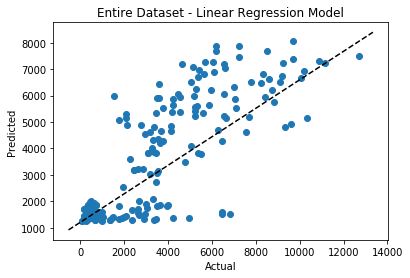

In [15]:
plt.scatter(y, lin_reg.predict(X))
plt.title("Entire Dataset - Linear Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

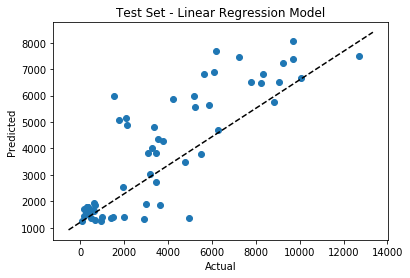

In [16]:
plt.scatter(y_test, lin_reg.predict(X_test))
plt.title("Test Set - Linear Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

# Decision Tree Regression

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 47)

In [18]:
tree_reg.fit(X, y)
tree_reg_model_predictions = tree_reg.predict(X)
tree_reg_model_accuracy = tree_reg.score(X, y)
print("Model Accuracy of The Decision Tree Regression Model:", "{:.4%}".format(tree_reg_model_accuracy))
tree_reg_model_mse = mean_squared_error(y, tree_reg_model_predictions)
tree_reg_model_rmse = np.sqrt(tree_reg_model_mse)
print("Model RMSE of The Decision Tree Regression Model: %.4f" %tree_reg_model_rmse)

Model Accuracy of The Decision Tree Regression Model: 100.0000%
Model RMSE of The Decision Tree Regression Model: 0.0000


In [19]:
tree_reg.fit(X_train, y_train)
tree_reg_test_predictions = tree_reg.predict(X_test)
tree_reg_test_accuracy = tree_reg.score(X_test, y_test)
print("Tests Accuracy of The Decision Tree Regression Model:", "{:.4%}".format(tree_reg_test_accuracy))
tree_reg_test_mse = mean_squared_error(y_test, tree_reg_test_predictions)
tree_reg_test_rmse = np.sqrt(tree_reg_test_mse)
print("Tests RMSE of The Decision Tree Regression Model: %.4f" %tree_reg_test_rmse)

Tests Accuracy of The Decision Tree Regression Model: 21.4052%
Tests RMSE of The Decision Tree Regression Model: 2856.6736


In [20]:
tree_reg_test_accuracy = tree_reg.score(X_test, y_test)
print("Accuracy of The Decision Tree Regression Model:", "{:.4%}".format(tree_reg_test_accuracy))

Accuracy of The Decision Tree Regression Model: 21.4052%


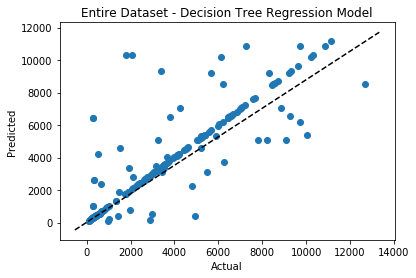

In [21]:
plt.scatter(y, tree_reg.predict(X))
plt.title("Entire Dataset - Decision Tree Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

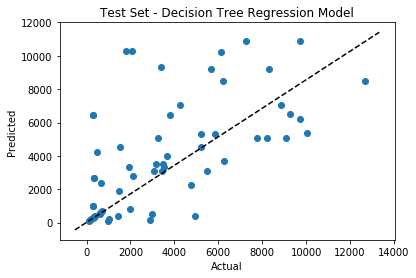

In [22]:
plt.scatter(y_test, tree_reg.predict(X_test))
plt.title("Test Set - Decision Tree Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

# Random Forest Regression

In [23]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 47)

In [24]:
forest_reg.fit(X, y)
forest_reg_model_predictions = forest_reg.predict(X)
forest_reg_model_accuracy = forest_reg.score(X, y)
print("Model Accuracy of The Random Forest Regression Model:", "{:.4%}".format(forest_reg_model_accuracy))
forest_reg_model_mse = mean_squared_error(y, forest_reg_model_predictions)
forest_reg_model_rmse = np.sqrt(forest_reg_model_mse)
print("Model RMSE of The Random Forest Regression Model: %.4f" %forest_reg_model_rmse)

Model Accuracy of The Random Forest Regression Model: 89.8761%
Model RMSE of The Random Forest Regression Model: 944.6281


In [25]:
forest_reg.fit(X_train, y_train)
forest_reg_test_predictions = forest_reg.predict(X_test)
forest_reg_test_accuracy = forest_reg.score(X_test, y_test)
print("Tests Accuracy of The Random Forest Regression Model:", "{:.4%}".format(forest_reg_test_accuracy))
forest_reg_test_mse = mean_squared_error(y_test, forest_reg_test_predictions)
forest_reg_test_rmse = np.sqrt(forest_reg_test_mse)
print("Tests RMSE of The Random Forest Regression Model: %.4f" %forest_reg_test_rmse)

Tests Accuracy of The Random Forest Regression Model: 46.7899%
Tests RMSE of The Random Forest Regression Model: 2350.5025


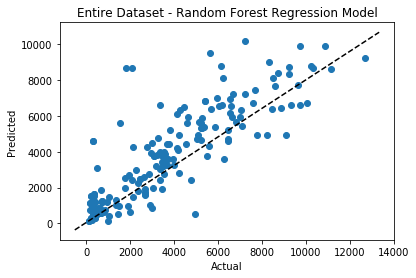

In [26]:
plt.scatter(y, forest_reg.predict(X))
plt.title("Entire Dataset - Random Forest Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

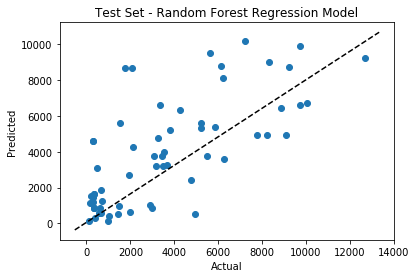

In [27]:
plt.scatter(y_test, forest_reg.predict(X_test))
plt.title("Test Set - Random Forest Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

# Ridge Regression

In [28]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(normalize = True, random_state = 47)

In [29]:
ridge_reg.fit(X, y)
ridge_reg_model_predictions = ridge_reg.predict(X)
ridge_reg_model_accuracy = ridge_reg.score(X, y)
print("Model Accuracy of The Ridge Regression Model:", "{:.4%}".format(ridge_reg_model_accuracy))
ridge_reg_model_mse = mean_squared_error(y, ridge_reg_model_predictions)
ridge_reg_model_rmse = np.sqrt(ridge_reg_model_mse)
print("Model RMSE of The Ridge Regression Model: %.4f" %ridge_reg_model_rmse)

Model Accuracy of The Ridge Regression Model: 48.0094%
Model RMSE of The Ridge Regression Model: 2140.6640


In [30]:
ridge_reg.fit(X_train, y_train)
ridge_reg_test_predictions = ridge_reg.predict(X_test)
ridge_reg_test_accuracy = ridge_reg.score(X_test, y_test)
print("Tests Accuracy of The Ridge Regression Model:", "{:.4%}".format(ridge_reg_test_accuracy))
ridge_reg_test_mse = mean_squared_error(y_test, ridge_reg_test_predictions)
ridge_reg_test_rmse = np.sqrt(ridge_reg_test_mse)
print("Tests RMSE of The Ridge Regression Model: %.4f" %ridge_reg_test_rmse)

Tests Accuracy of The Ridge Regression Model: 47.6027%
Tests RMSE of The Ridge Regression Model: 2332.4813


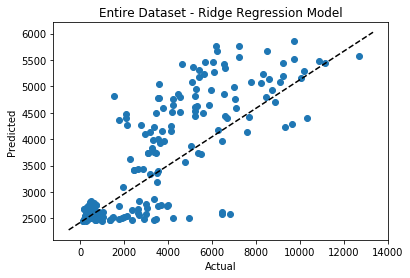

In [31]:
plt.scatter(y, ridge_reg.predict(X))
plt.title("Entire Dataset - Ridge Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

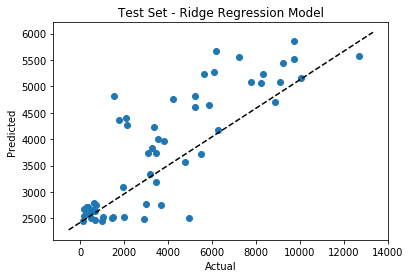

In [32]:
plt.scatter(y_test, ridge_reg.predict(X_test))
plt.title("Test Set - Ridge Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

# Lasso Regression

In [33]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(normalize = True, random_state = 47)

In [34]:
lasso_reg.fit(X, y)
lasso_reg_model_predictions = lasso_reg.predict(X)
lasso_reg_model_accuracy = lasso_reg.score(X, y)
print("Model Accuracy of The Lasso Regression Model:", "{:.4%}".format(lasso_reg_model_accuracy))
lasso_reg_model_mse = mean_squared_error(y, lasso_reg_model_predictions)
lasso_reg_model_rmse = np.sqrt(lasso_reg_model_mse)
print("Model RMSE of The Lasso Regression Model: %.4f" %lasso_reg_model_rmse)

Model Accuracy of The Lasso Regression Model: 64.0103%
Model RMSE of The Lasso Regression Model: 1781.0449


In [35]:
lasso_reg.fit(X_train, y_train)
lasso_reg_test_predictions = lasso_reg.predict(X_test)
lasso_reg_test_accuracy = lasso_reg.score(X_test, y_test)
print("Tests Accuracy of The Lasso Regression Model:", "{:.4%}".format(lasso_reg_test_accuracy))
lasso_reg_test_mse = mean_squared_error(y_test, lasso_reg_test_predictions)
lasso_reg_test_rmse = np.sqrt(lasso_reg_test_mse)
print("Tests RMSE of The Lasso Regression Model: %.4f" %lasso_reg_test_rmse)

Tests Accuracy of The Lasso Regression Model: 70.5051%
Tests RMSE of The Lasso Regression Model: 1749.9977


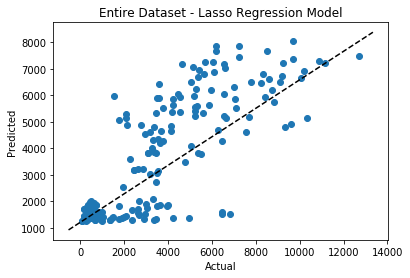

In [36]:
plt.scatter(y, lasso_reg.predict(X))
plt.title("Entire Dataset - Lasso Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

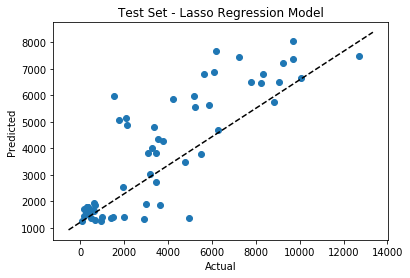

In [37]:
plt.scatter(y_test, lasso_reg.predict(X_test))
plt.title("Test Set - Lasso Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

# Elastic Net Regression

In [38]:
from sklearn.linear_model import ElasticNet

net_reg = ElasticNet(random_state = 47)

In [39]:
net_reg.fit(X, y)
net_reg_model_predictions = net_reg.predict(X)
net_reg_model_accuracy = net_reg.score(X, y)
print("Model Accuracy of The Elastic Net Regression Model:", "{:.4%}".format(net_reg_model_accuracy))
net_reg_model_mse = mean_squared_error(y, net_reg_model_predictions)
net_reg_model_rmse = np.sqrt(net_reg_model_mse)
print("Model RMSE of The Elastic Net Regression Model: %.4f" %net_reg_model_rmse)

Model Accuracy of The Elastic Net Regression Model: 64.0125%
Model RMSE of The Elastic Net Regression Model: 1780.9916


In [40]:
net_reg.fit(X_train, y_train)
net_reg_test_predictions = net_reg.predict(X_test)
net_reg_test_accuracy = net_reg.score(X_test, y_test)
print("Tests Accuracy of The Elastic Net Regression Model:", "{:.4%}".format(net_reg_test_accuracy))
net_reg_test_mse = mean_squared_error(y_test, net_reg_test_predictions)
net_reg_test_rmse = np.sqrt(net_reg_test_mse)
print("Tests RMSE of The Elastic Net Regression Model: %.4f" %net_reg_test_rmse)

Tests Accuracy of The Elastic Net Regression Model: 70.6164%
Tests RMSE of The Elastic Net Regression Model: 1746.6920


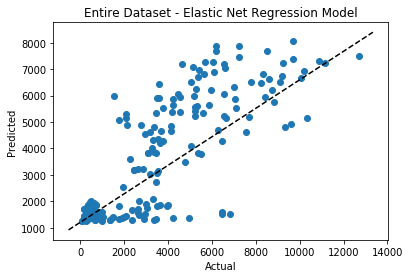

In [41]:
plt.scatter(y, net_reg.predict(X))
plt.title("Entire Dataset - Elastic Net Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

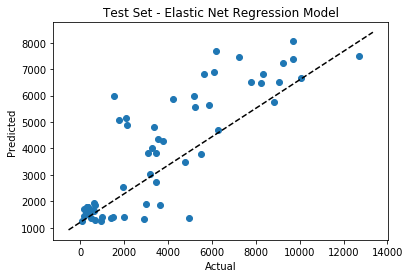

In [42]:
plt.scatter(y_test, net_reg.predict(X_test))
plt.title("Test Set - Elastic Net Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

# K-Nearest Neighbors Regression

In [43]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=8)

In [44]:
knn_reg.fit(X, y)
knn_reg_model_predictions = knn_reg.predict(X)
knn_reg_model_accuracy = knn_reg.score(X, y)
print("Model Accuracy of The K-Nearest Neighbors Regression Model:", "{:.4%}".format(knn_reg_model_accuracy))
knn_reg_model_mse = mean_squared_error(y, knn_reg_model_predictions)
knn_reg_model_rmse = np.sqrt(knn_reg_model_mse)
print("Model RMSE of The K-Nearest Neighbors Regression Model: %.4f" %knn_reg_model_rmse)

Model Accuracy of The K-Nearest Neighbors Regression Model: 66.8049%
Model RMSE of The K-Nearest Neighbors Regression Model: 1710.4999


In [45]:
knn_reg.fit(X_train, y_train)
knn_reg_test_predictions = knn_reg.predict(X_test)
knn_reg_test_accuracy = knn_reg.score(X_test, y_test)
print("Tests Accuracy of The K-Nearest Neighbors Regression Model:", "{:.4%}".format(knn_reg_test_accuracy))
knn_reg_test_mse = mean_squared_error(y_test, knn_reg_test_predictions)
knn_reg_test_rmse = np.sqrt(knn_reg_test_mse)
print("Tests RMSE of The K-Nearest Neighbors Regression Model: %.4f" %knn_reg_test_rmse)

Tests Accuracy of The K-Nearest Neighbors Regression Model: 64.0274%
Tests RMSE of The K-Nearest Neighbors Regression Model: 1932.6325


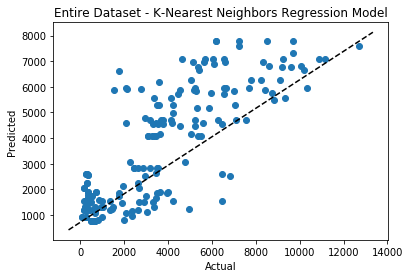

In [46]:
plt.scatter(y, knn_reg.predict(X))
plt.title("Entire Dataset - K-Nearest Neighbors Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

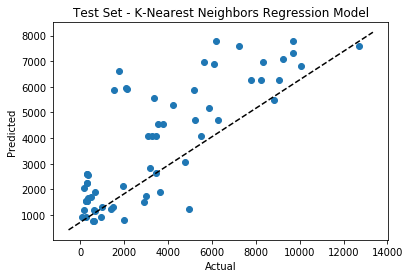

In [47]:
plt.scatter(y_test, knn_reg.predict(X_test))
plt.title("Test Set - K-Nearest Neighbors Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

# Gradient Boosting Regression

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 1, random_state = 47, loss = 'ls')

In [49]:
grad_reg.fit(X, y)
grad_reg_model_predictions = grad_reg.predict(X)
grad_reg_model_accuracy = grad_reg.score(X, y)
print("Model Accuracy of The Gradient Boosting Regression Model:", "{:.4%}".format(grad_reg_model_accuracy))
grad_reg_model_mse = mean_squared_error(y, grad_reg_model_predictions)
grad_reg_model_rmse = np.sqrt(grad_reg_model_mse)
print("Model RMSE of The Gradient Boosting Regression Model: %.4f" %grad_reg_model_rmse)

Model Accuracy of The Gradient Boosting Regression Model: 68.2723%
Model RMSE of The Gradient Boosting Regression Model: 1672.2655


In [50]:
grad_reg.fit(X_train, y_train)
grad_reg_test_predictions = grad_reg.predict(X_test)
grad_reg_test_accuracy = grad_reg.score(X_test, y_test)
print("Tests Accuracy of The Gradient Boosting Regression Model:", "{:.4%}".format(grad_reg_test_accuracy))
grad_reg_test_mse = mean_squared_error(y_test, grad_reg_test_predictions)
grad_reg_test_rmse = np.sqrt(grad_reg_test_mse)
print("Tests RMSE of The Gradient Boosting Regression Model: %.4f" %grad_reg_test_rmse)

Tests Accuracy of The Gradient Boosting Regression Model: 65.7214%
Tests RMSE of The Gradient Boosting Regression Model: 1886.5810


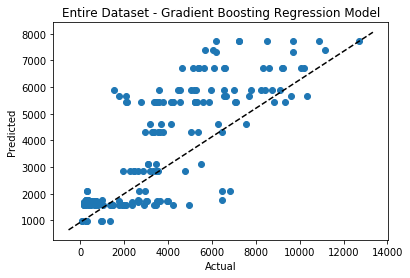

In [51]:
plt.scatter(y, grad_reg.predict(X))
plt.title("Entire Dataset - Gradient Boosting Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

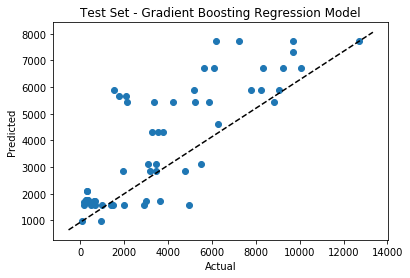

In [52]:
plt.scatter(y_test, grad_reg.predict(X_test))
plt.title("Test Set - Gradient Boosting Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

# XGBoost Regression

In [53]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth=5, random_state=47, learning_rate=0.08, n_jobs=-1)

In [54]:
xgb_reg.fit(X, y)
xgb_reg_model_predictions = xgb_reg.predict(X)
xgb_reg_model_accuracy = xgb_reg.score(X, y)
print("Model Accuracy of The XGBoost Regression Model:", "{:.4%}".format(xgb_reg_model_accuracy))
xgb_reg_model_mse = mean_squared_error(y, xgb_reg_model_predictions)
xgb_reg_model_rmse = np.sqrt(xgb_reg_model_mse)
print("Model RMSE of The XGBoost Regression Model: %.4f" %xgb_reg_model_rmse)

Model Accuracy of The XGBoost Regression Model: 89.4119%
Model RMSE of The XGBoost Regression Model: 966.0385


In [55]:
xgb_reg.fit(X_train, y_train)
xgb_reg_test_predictions = xgb_reg.predict(X_test)
xgb_reg_test_accuracy = xgb_reg.score(X_test, y_test)
print("Tests Accuracy of The XGBoost Regression Model:", "{:.4%}".format(xgb_reg_test_accuracy))
xgb_reg_test_mse = mean_squared_error(y_test, xgb_reg_test_predictions)
xgb_reg_test_rmse = np.sqrt(xgb_reg_test_mse)
print("Tests RMSE of The XGBoost Regression Model: %.4f" %xgb_reg_test_rmse)

Tests Accuracy of The XGBoost Regression Model: 41.2453%
Tests RMSE of The XGBoost Regression Model: 2469.9322


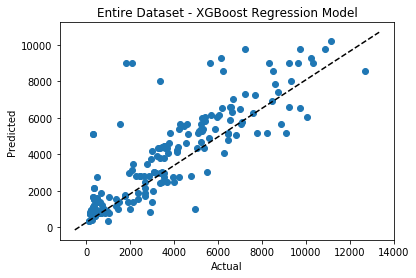

In [56]:
plt.scatter(y, xgb_reg.predict(X))
plt.title("Entire Dataset - XGBoost Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

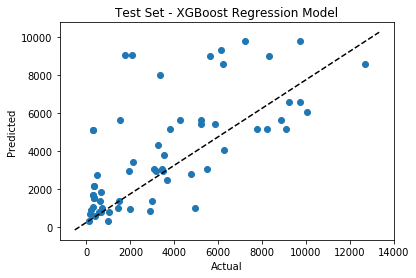

In [57]:
plt.scatter(y_test, xgb_reg.predict(X_test))
plt.title("Test Set - XGBoost Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

# AdaBoost Regression

In [58]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators = 100, random_state = 47)

In [59]:
ada_reg.fit(X, y)
ada_reg_model_predictions = ada_reg.predict(X)
ada_reg_model_accuracy = ada_reg.score(X, y)
print("Model Accuracy of The AdaBoost Regression Model:", "{:.4%}".format(ada_reg_model_accuracy))
ada_reg_model_mse = mean_squared_error(y, ada_reg_model_predictions)
ada_reg_model_rmse = np.sqrt(ada_reg_model_mse)
print("Model RMSE of The AdaBoost Regression Model: %.4f" %ada_reg_model_rmse)

Model Accuracy of The AdaBoost Regression Model: 64.1238%
Model RMSE of The AdaBoost Regression Model: 1778.2340


In [60]:
ada_reg.fit(X_train, y_train)
ada_reg_test_predictions = ada_reg.predict(X_test)
ada_reg_test_accuracy = ada_reg.score(X_test, y_test)
print("Tests Accuracy of The AdaBoost Regression Model:", "{:.4%}".format(ada_reg_test_accuracy))
ada_reg_test_mse = mean_squared_error(y_test, ada_reg_test_predictions)
ada_reg_test_rmse = np.sqrt(ada_reg_test_mse)
print("Tests RMSE of The AdaBoost Regression Model: %.4f" %ada_reg_test_rmse)

Tests Accuracy of The AdaBoost Regression Model: 54.2257%
Tests RMSE of The AdaBoost Regression Model: 2180.0893


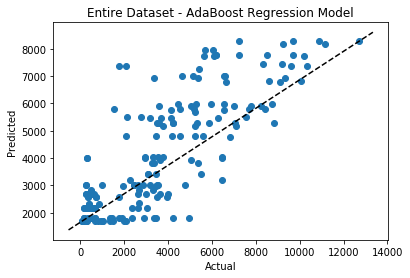

In [61]:
plt.scatter(y, ada_reg.predict(X))
plt.title("Entire Dataset - AdaBoost Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

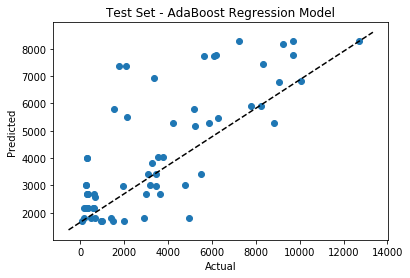

In [62]:
plt.scatter(y_test, ada_reg.predict(X_test))
plt.title("Test Set - AdaBoost Regression Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

# Compare Models Performance

In [63]:
models = ['Linear Regression','Decision Tree Regression','Random Forest Regression',
          'Ridge Regression','Lasso Regression','Elastic Net Regression',
          'K-Nearest Neighbors Regression','Gradient Boosting Regression','XGBoost Regression',
          'AdaBoost Regression'] 

models_rmse = [lin_reg_model_rmse, tree_reg_model_rmse, forest_reg_model_rmse,
              ridge_reg_model_rmse, lasso_reg_model_rmse, net_reg_model_rmse,
              knn_reg_model_rmse, grad_reg_model_rmse, xgb_reg_model_rmse,
             ada_reg_model_rmse] 

models_accuracy = [lin_reg_model_accuracy, tree_reg_model_accuracy, forest_reg_model_accuracy,
              ridge_reg_model_accuracy, lasso_reg_model_accuracy, net_reg_model_accuracy,
              knn_reg_model_accuracy, grad_reg_model_accuracy, xgb_reg_model_accuracy,
             ada_reg_model_accuracy]

tests_rmse = [lin_reg_test_rmse, tree_reg_test_rmse, forest_reg_test_rmse,
              ridge_reg_test_rmse, lasso_reg_test_rmse, net_reg_test_rmse,
              knn_reg_test_rmse, grad_reg_test_rmse, xgb_reg_test_rmse,
             ada_reg_test_rmse] 

tests_accuracy = [lin_reg_test_accuracy, tree_reg_test_accuracy, forest_reg_test_accuracy,
              ridge_reg_test_accuracy, lasso_reg_test_accuracy, net_reg_test_accuracy,
              knn_reg_test_accuracy, grad_reg_test_accuracy, xgb_reg_test_accuracy,
             ada_reg_test_accuracy] 

In [64]:
compare_models = pd.DataFrame({ "Algorithms": models, "Models RMSE": models_rmse, 
                               "Models Accuracy": models_accuracy, "Tests RMSE": tests_rmse,
                               "Tests Accuracy": tests_accuracy })
compare_models.sort_values(by = "Tests RMSE", ascending = True)

,Algorithms,Models RMSE,Models Accuracy,Tests RMSE,Tests Accuracy
0,Linear Regression,1780.991566,0.640125,1746.691873,0.706164
5,Elastic Net Regression,1780.991566,0.640125,1746.692041,0.706164
4,Lasso Regression,1781.044906,0.640103,1749.997711,0.705051
7,Gradient Boosting Regression,1672.265510,0.682723,1886.581050,0.657214
6,K-Nearest Neighbors Regression,1710.499949,0.668049,1932.632534,0.640274
9,AdaBoost Regression,1778.233952,0.641238,2180.089300,0.542257
3,Ridge Regression,2140.663959,0.480094,2332.481288,0.476027
2,Random Forest Regression,944.628138,0.898761,2350.502454,0.467899
8,XGBoost Regression,966.038496,0.894119,2469.932210,0.412453
1,Decision Tree Regression,0.000000,1.000000,2856.673590,0.214052


Okay. I was really surprised seeing some 1746.6918 Tests RMSE from the Linear Regression Model. 

Another model that we could depend on is the Elastic Net Regression. It works relatively fine in my opinion.

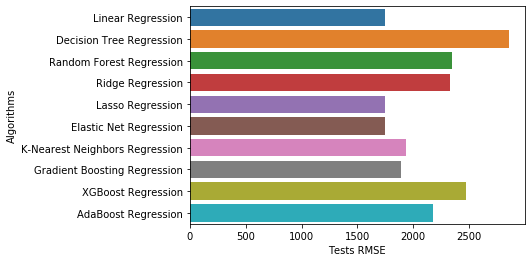

In [65]:
sns.barplot(x = "Tests RMSE", y = "Algorithms", data = compare_models)
plt.show()

The Linear Regression Model wins it all here!

# Deployment

Estimate the value of the following equity:<br> 
* Equity_Attributable_to_Owners: 5000

In [66]:
pred = int(lin_reg.predict(np.array([5000]).reshape(1, -1)))
std = int(lin_reg_test_rmse)

In [71]:
print("\033[1m The Value in Force ranges from $",'{:,}'.format(pred - std), "to $",'{:,}'.format(pred + std), "with a mean value of $",'{:,}'.format(pred))

 The Value in Force ranges from $ 5,311 to $ 8,803 with a mean value of $ 7,057
